# K-NEAREST NEIGHBOURS

## EDA

In [1]:
import pandas as pd

In [3]:
Data = pd.read_csv('Zoo.csv')
Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
Data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [9]:
Data.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Data['animal name'] = encoder.fit_transform(Data['animal name'])

In [21]:
Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [23]:
Data.drop(columns = ['animal name'])

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [26]:
X_train = Data.drop('type', axis = 1)
y_train = Data['type']

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy  as np
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [30]:
X_train_df = pd.DataFrame(X_train, columns=Data.drop(columns=['type']).columns)
print(X_train_df.head())


   animal name      hair  feathers      eggs      milk  airborne   aquatic  \
0    -1.708840  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208   
1    -1.674148  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208   
2    -1.639456 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710   
3    -1.604764  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208   
4    -1.570072  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208   

   predator   toothed  backbone  breathes  venomous      fins      legs  \
0  0.896421  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540   
1 -1.115547  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540   
2  0.896421  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435   
3  0.896421  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540   
4  0.896421  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540   

       tail  domestic   catsize  
0 -1.698416 -0.384353  1.138180  
1  0.588784 

In [32]:
y_train.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [34]:
y_train.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [36]:
!pip install --upgrade scikit-learn

In [ ]:
'''import sklearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)  # Reduce k_neighbors
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)'''


# Split the Dataset

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Appropriate Distance Metric and Value for K

In [44]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_knn = grid_search.best_estimator_

C:\Users\basan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}


## Evaluate the Classifier's Performance

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Confusion Matrix:
[[4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 3]]


## Visualize the Decision Boundaries

In [65]:
!pip install mlxtend

C:\Users\basan\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


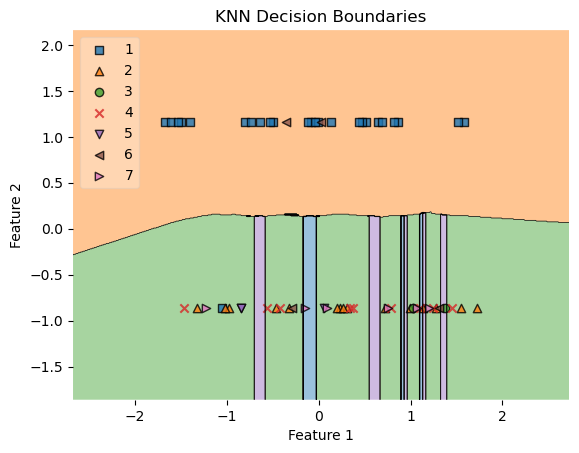

In [69]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Select two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
#y_train = y_train.to_numpy()

# Train a KNN model on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
plot_decision_regions(X_train_2d, y_train, clf=knn_2d, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [52]:
model_K = KNeighborsClassifier()
model_K.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = model_K.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
print('accuracy:' , accuracy_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred, average='weighted', zero_division = -0))
print('Recall:', recall_score(y_test, y_pred,average = 'weighted',zero_division = 0))
print('F1 Score:' , f1_score(y_test, y_pred, average='weighted',zero_division = 0))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred))
#print('Classification Report:' , classification_report(y_test, y_pred))

accuracy: 0.8125
Precision: 0.8541666666666667
Recall: 0.8125
F1 Score: 0.8250000000000001
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 2]]


##  Interview Questions:

In [ ]:
1. What are the key hyperparameters in KNN?

K (number of neighbors):
Determines the number of nearest neighbors to consider when making a prediction.
A small K may lead to overfitting, while a large K may lead to underfitting.

Distance metric:
Defines how the distance between data points is calculated.
Common metrics include Euclidean, Manhattan, and Minkowski distances.

Weights:
Determines whether all neighbors contribute equally (uniform) or closer neighbors contribute more (distance).

In [ ]:
2. What distance metrics can be used in KNN?
Euclidean distance:

The straight-line distance between two points in Euclidean space.

